# Data Mining ACW - Risk Classification

### Imports

Libraries are imported here; key libraries include Pandas for data frames and seaborn for visualisation

In [1]:
##############################
#         Import codes       #
##############################

#pip install --user pandas
#pip install --user seaborn
#pip install --user sklearn
#pip install --user pydotplus
#pip install --user Graphviz (Also Install external application(https://www.graphviz.org/download/))

#Graphviz is used as the majority of Decision Trees are plotted using it online

#Data manipulation imports
import pandas as pd #Dataframes
import numpy as np #maths and arrays
from sklearn.model_selection import train_test_split #Data Splitting
from sklearn.metrics import accuracy_score #Accuracy Metric Calulations
from sklearn.metrics import confusion_matrix # Confusion Matrixes 
from sklearn import preprocessing  #label Encoder

#Visualising Imports
import seaborn as sns #Visualising Graphs
import matplotlib.pyplot as plt #Plot Graphs

#Model Imports
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.tree import plot_tree #DecisionTree
from sklearn.externals.six import StringIO #DecisionTree
import pydotplus # used in DecisionTree
from sklearn import tree as tree #DecisionTree
from IPython.display import Image #Export the DecisionTree as a png
from sklearn.neural_network import MLPClassifier #Neural Network

#Evaluation Imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn import metrics

c:\users\james\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Confusion Matrixes Method

In [2]:
#Code taken and editied to make confusin matrixes look cleaner than an array 
#Additionally used for easy normalisation of confusion matrixes data
#(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) 
#Labels edited for the classification required by this data



classes = ["Risk","NoRisk"] #set clasess for data analysing 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title: #sets title of confustion matrix if there isnt one
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # set confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data bhased on the set class data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Data Preparation

## Data Cleaning

### Import data

In [3]:
MedicalRecords = pd.read_csv("600092_data.csv").copy() # Importing csv
MedicalRecordsWorkingCopy = MedicalRecords.copy() #make a copy of the data

MedicalRecordsWorkingCopy.head() #Display the top 5 records

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


### Check for Null Values

In this stage Null values are dropped as the percentage of the data that they affect are very low and if this data is imputed it may affect the accuracy of the data models later on in the modelling stage.

In this stage some inconsistencies with medical terms affected the data integrity so have been merged.

### Find all values and compare against data description

In [4]:
#Pandas Unique Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

#Check the values of Random
print("Values of Random are:",MedicalRecordsWorkingCopy['Random'].unique(),"\n")
#Check the values of Id
print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
#Check the values of Indication
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
#Check the values of IHD
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
#Check the values of Arrhythmia
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
#Check the values of History
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
#Check the values of IPSI
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
#Check the values of Contra
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
#Check the values of label
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Random are: [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes' nan] 

Values of IPSI are: [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. nan 69. 72.] 

Values of Contra are: ['20 ' '60 ' '40' '85' '95' '100' '50' '50 ' '30 ' '40 ' '80' '25 ' '75 '
 '10 ' '70 ' '15 ' '75' '35 ' '30' '80 ' '55 ' '100 ' '90' '85 ' '79'
 '45 ' '65 ' '90 ' '62' '53' '51 ' '70' '60' '35' '55' '16 ' '73 ' ' '
 '10' '20' '65'] 

Values of label are: ['NoRisk' 'Risk' 'Unknown' nan] 



In [5]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication'].isnull()] #3 Null Values in Indication

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
822,0.211760,205845,NaN,no,yes,no,no,no,80.0,100,Risk
1007,0.761219,256076,NaN,no,no,no,yes,yes,99.0,100,Risk


In [6]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Diabetes'].isnull()] #2 Null Values in Diabetes

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


In [7]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Hypertension'].isnull()] # 3 Null values in Hypertension

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
983,0.319215,158024,TIA,no,no,NaN,no,no,75.0,75,NoRisk


In [8]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['History'].isnull()] #2 Null Values in History

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100,Risk


In [9]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['IPSI'].isnull()] #4 Null values in ISPI

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100,Risk
845,0.920096,104176,CVA,no,no,no,no,no,NaN,20,NoRisk
916,0.004501,281679,A-F,no,no,no,no,no,NaN,50,NoRisk


In [10]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'].isnull()] #3 Null Values in Label

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,0.756938,190671,CVA,no,yes,yes,no,no,76.0,50,NaN
974,0.923418,165432,CVA,no,yes,yes,yes,no,80.0,70,NaN
1418,0.813102,169726,TIA,yes,no,no,no,yes,90.0,50,NaN


Find any Unknown Values as Unknown Values are Essentially the same as Null, the data description provided states there should only be Risk and NoRisk

In [11]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label']=="Unknown"] #2 Values Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown


Find any Blank Values as Blank Values are Essentially the same as Null, the data description provided states there should only be ints here

In [12]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "] #1 Value Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,,NoRisk


20/1520 Identified as Null/Unknown/Blank which is 1.3% of the whole dataset, this is very small dropping these values may be the best option as imputing them may cause the data to be less accurate later on

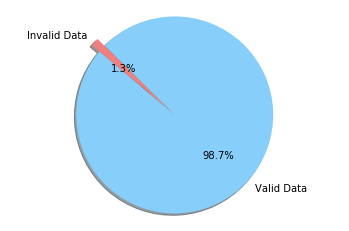

In [13]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

#Display a pie chart showing the impact of dropping the values

labels = 'Valid Data', 'Invalid Data' # set the titles for each section
sizes = [1500, 20] # Set the values, 20 dropped, 1500 Valid Records 
colors = ['lightskyblue', 'lightcoral'] #set the colours 
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140) #set the angles

plt.axis('equal')
plt.show() #show the pie chart

### Drop the Records

In [14]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Indication"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Diabetes"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Hypertension"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["History"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["IPSI"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["label"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'] == "Unknown"].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy.head() #Display the top 5 results


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


### Data Duplication

There are 2 Versions of ASx one with less records and 1 with more

In [15]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"].head() #check the values of "Asx"

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
68,0.549947,113727,Asx,yes,yes,yes,no,no,75.0,100,Risk
111,0.171185,95883,Asx,yes,yes,yes,yes,no,99.0,75,Risk
131,0.511954,95004,Asx,no,yes,yes,yes,no,75.0,100,Risk
172,0.209577,84632,Asx,yes,yes,yes,no,no,90.0,95,Risk
177,0.895377,230462,Asx,no,yes,yes,yes,no,80.0,53,Risk


In [16]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="ASx"].head() # Check the values of "ASx"

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,ASx,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,ASx,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,ASx,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,ASx,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,ASx,no,yes,no,no,no,76.0,50,NoRisk


According to the medical dictionary (https://medical-dictionary.thefreedictionary.com/Asx) the correct version of this acronym is Asx. 

Change ASx to Asx

In [17]:
#Pandas Replace Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.replace('ASx','Asx') #Replace "ASx" data with "Asx"
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"].head() #Display the top 5 Results

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,Asx,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,Asx,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,Asx,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,Asx,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,Asx,no,yes,no,no,no,76.0,50,NoRisk


In [18]:
#Pandas is_unique is different from Unique, Returns bool values
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.is_unique.html

#Check if the value of "Random" is unique
print ("Is Random truley unique to each record:",MedicalRecordsWorkingCopy['Random'].is_unique,"\n")
#Check if the value of "Id" is unique
print ("Is Id unique to each record:",MedicalRecordsWorkingCopy['Id'].is_unique)

Is Random truley unique to each record: False 

Is Id unique to each record: True


The Data Dictionary states that Random is a completely unique value however, as seen above the data repeats itself, but Id is completely unique. Is the data wrong or the values value names in the wrong order? 

it is highly probable that the value names are the wrong way around and as you can see by the bar chart below you can see how many times a patient visited a hospital if "Random" was "ID". This should have been ironed out in the business understanding phase of CRISP-DM, however due to not having any contact with the outside business the data has been kept  the same as the Data Description.


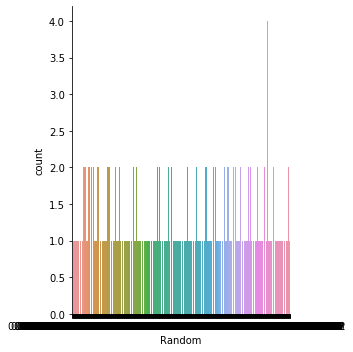

In [19]:
#Plot a bar chart showing how many patients visted twice or more
#Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot("Random",data = MedicalRecordsWorkingCopy, kind = 'count') 

### Droping Duplicates?

Dropping the duplicates (patients that visited more than once) would drop a significant portion of the data (as seen below) so the datasets accuracy might be severely affected later on in the process. Additionally, considering I’m only predicting if a Patient is a Risk or not I don't mind having duplicates in my data as this will not affect my end classification.

Number of duplicated records 289


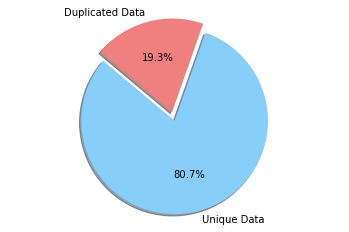

In [20]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

count = 0 #Declare a count varible
DuplicatedNo = MedicalRecordsWorkingCopy['Random'].duplicated() #check what values are duplicated
for x in DuplicatedNo: #for every value is Duplicated true 
    if x == True:
        count = count + 1 #if true add 1 to duplicate count
        
print("Number of duplicated records",count) #Print the number of duplicates


labels = 'Unique Data', 'Duplicated Data' #Label the segments 
sizes = [1211, 289] #Show the values of the duplicated data
colors = ['lightskyblue', 'lightcoral'] #set the colours
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show() #show the chart

### Check Data Types

Check if the data types line up with the data description given if not change them to be accurate to the data description.

In [21]:
#dtypes documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
MedicalRecordsWorkingCopy.dtypes #Check the data types

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

IPSI is stated to be an Int in the data description however it is currently a float

In [22]:
#Pandas astype Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
MedicalRecordsWorkingCopy['IPSI'] = MedicalRecordsWorkingCopy['IPSI'].astype(int) #change IPSI from float to Int

Contra is stated to be an Int in the data description however it is currently an object.

In [23]:
#change IPSI from Object to Int
MedicalRecordsWorkingCopy['Contra'] = MedicalRecordsWorkingCopy['Contra'].astype(int)
#display the data types to show the changed data types
MedicalRecordsWorkingCopy.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI              int32
Contra            int32
label            object
dtype: object

### Check if data is fully clean

This data should align with the given data description

In [24]:
#Pandas Unique Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

#Check the values of Random
print("Values of Random are:",MedicalRecordsWorkingCopy['Random'].unique(),"\n")
#Check the values of Id
print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
#Check the values of Indication
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
#Check the values of IHD
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
#Check the values of Arrhythmia
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
#Check the values of History
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
#Check the values of IPSI
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
#Check the values of Contra
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
#Check the values of label
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Random are: [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'Asx'] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes'] 

Values of IPSI are: [78 70 95 90 75 81 80 76 82 85 68 50 73 99 71 65 74 98 97 60 67 79 77 84
 55 35 51 69 72] 

Values of Contra are: [ 20  60  40  85  95 100  50  30  80  25  75  10  70  15  35  55  90  79
  45  65  62  53  51  16  73] 

Values of label are: ['NoRisk' 'Risk'] 



### What Values are Required for classification?

Most values in this data set are needed for the classification as they have meaning and could affect the outcome. However, Id and Random doesn’t actually matter as knowing who someone is won't affect the end result, for that reason I have dropped these 2 columns.

Indication has also been split up to allow for correlations between the situations that hospitalised the patient. 

These columns will be added back in later to test if they did have an effect.

In [25]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop(columns=['Id','Random'])#Drop ID and Random
MedicalRecordsWorkingCopy.head()#Display the top 5 Results

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78,20,NoRisk
1,TIA,no,no,no,no,no,70,60,NoRisk
2,A-F,no,yes,yes,no,no,95,40,Risk
3,TIA,no,no,yes,no,no,90,85,Risk
4,CVA,no,no,no,no,no,70,20,NoRisk


Split the Indication values into 4 columbs to allow for correlations between the conditions

In [26]:
#Get_Dummies Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

#Get the independant columns for Indication and split it up
dummiesIndication = MedicalRecordsWorkingCopy["Indication"].str.get_dummies(" ") 
#Drop the original Indication Data
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop(columns=['Indication'])
#data to concatanate
frames = [MedicalRecordsWorkingCopy,dummiesIndication] 
#concated data
MedicalRecordsWorkingCopy = pd.concat(frames, axis=1) 
MedicalRecordsWorkingCopy.head() #Display the top 5 result

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,A-F,Asx,CVA,TIA
0,no,no,yes,no,no,78,20,NoRisk,1,0,0,0
1,no,no,no,no,no,70,60,NoRisk,0,0,0,1
2,no,yes,yes,no,no,95,40,Risk,1,0,0,0
3,no,no,yes,no,no,90,85,Risk,0,0,0,1
4,no,no,no,no,no,70,20,NoRisk,0,0,1,0


### Finding Correlations

Finding Correlations in the data is important as it shows where one data variable (IPSI, Contra, Diabetes ...etc) may affect another variable in the data. This is important for this data as knowing what data affects someone who is at risk is key to predicting is someone new has a risk or not. 

I can then compare my predictions as to what’s important to what my models think are important.

Values need to be numbers in order to find the correlation values of the data, therefore a copy of the data has been made and some values have been replacing by dummies. Label encoder from sklearn was used as it was easier to set all of the values to binary digits, Get dummies was used when I wanted to split the values into two separate columns


In [27]:
#Create a copy of the Medical Records dataset for correlations 
MedicalRecordsDummies = MedicalRecordsWorkingCopy.copy()
#Display the top 5 results
MedicalRecordsDummies.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,A-F,Asx,CVA,TIA
0,no,no,yes,no,no,78,20,NoRisk,1,0,0,0
1,no,no,no,no,no,70,60,NoRisk,0,0,0,1
2,no,yes,yes,no,no,95,40,Risk,1,0,0,0
3,no,no,yes,no,no,90,85,Risk,0,0,0,1
4,no,no,no,no,no,70,20,NoRisk,0,0,1,0


Split label into Risk and NoRisk to see what impacts a Risk and NoRisk independently

In [28]:
#Get_dummies Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

#Get the dummies of the labels set splitting NoRisk and Risk up into two columns
dummiesLabel = MedicalRecordsDummies["label"].str.get_dummies(" ") 
#Drop the original label data
MedicalRecordsDummies = MedicalRecordsDummies.drop(columns=['label'])
#data to concatanate
frames = [MedicalRecordsDummies,dummiesLabel] 
#concated data
MedicalRecordsDummies = pd.concat(frames, axis=1) 

Turn the values into numerical values so .corr() and models can calculate correlations and predictions. 

In [29]:
#Sklearn LabelEncoder Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

#create label encoder object to use on data
le = preprocessing.LabelEncoder() 

#Transform Diabetes into binary numerical value
MedicalRecordsDummies['Diabetes'] = le.fit_transform(MedicalRecordsDummies['Diabetes'])
#Transform IHD into binary numerical value
MedicalRecordsDummies['IHD'] = le.fit_transform(MedicalRecordsDummies['IHD'])
#Transform Hypertension into binary numerical value
MedicalRecordsDummies['Hypertension'] = le.fit_transform(MedicalRecordsDummies['Hypertension'])
#Transform Arrhythmia into binary numerical value
MedicalRecordsDummies['Arrhythmia'] = le.fit_transform(MedicalRecordsDummies['Arrhythmia'])
#Transform History into binary numerical value
MedicalRecordsDummies['History'] = le.fit_transform(MedicalRecordsDummies['History'])
#Display the top 5 values
MedicalRecordsDummies.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA,NoRisk,Risk
0,0,0,1,0,0,78,20,1,0,0,0,1,0
1,0,0,0,0,0,70,60,0,0,0,1,1,0
2,0,1,1,0,0,95,40,1,0,0,0,0,1
3,0,0,1,0,0,90,85,0,0,0,1,0,1
4,0,0,0,0,0,70,20,0,0,1,0,1,0


### Plot the correlations

In [30]:
#Pandas corr Documentation - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

MedicalRecordsCorr = MedicalRecordsDummies.corr() #Plot correlations
MedicalRecordsCorr#Display correlations

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA,NoRisk,Risk
Diabetes,1.000000,0.064017,0.164368,0.095624,-0.002545,0.158694,0.188610,-0.009462,0.036593,-0.050563,0.032132,-0.285510,0.285510
IHD,0.064017,1.000000,0.137069,0.168570,-0.071391,0.090221,0.113951,0.049031,0.017554,-0.002756,-0.063760,-0.252071,0.252071
Hypertension,0.164368,0.137069,1.000000,0.289896,-0.073294,0.089246,0.113192,-0.101607,0.060377,0.080493,-0.021376,-0.387746,0.387746
Arrhythmia,0.095624,0.168570,0.289896,1.000000,0.003544,0.391332,0.496099,0.043948,0.099263,0.128973,-0.257589,-0.706442,0.706442
History,-0.002545,-0.071391,-0.073294,0.003544,1.000000,-0.000118,0.103961,-0.061189,-0.050040,0.000382,0.105230,0.003921,-0.003921
IPSI,0.158694,0.090221,0.089246,0.391332,-0.000118,1.000000,0.317034,0.151534,0.062849,-0.024505,-0.187714,-0.490566,0.490566
Contra,0.188610,0.113951,0.113192,0.496099,0.103961,0.317034,1.000000,-0.001670,0.020183,0.057459,-0.072738,-0.649821,0.649821
A-F,-0.009462,0.049031,-0.101607,0.043948,-0.061189,0.151534,-0.001670,1.000000,-0.285248,-0.424391,-0.410811,-0.117663,0.117663
Asx,0.036593,0.017554,0.060377,0.099263,-0.050040,0.062849,0.020183,-0.285248,1.000000,-0.250283,-0.242275,-0.128898,0.128898
CVA,-0.050563,-0.002756,0.080493,0.128973,0.000382,-0.024505,0.057459,-0.424391,-0.250283,1.000000,-0.360455,0.018023,-0.018023


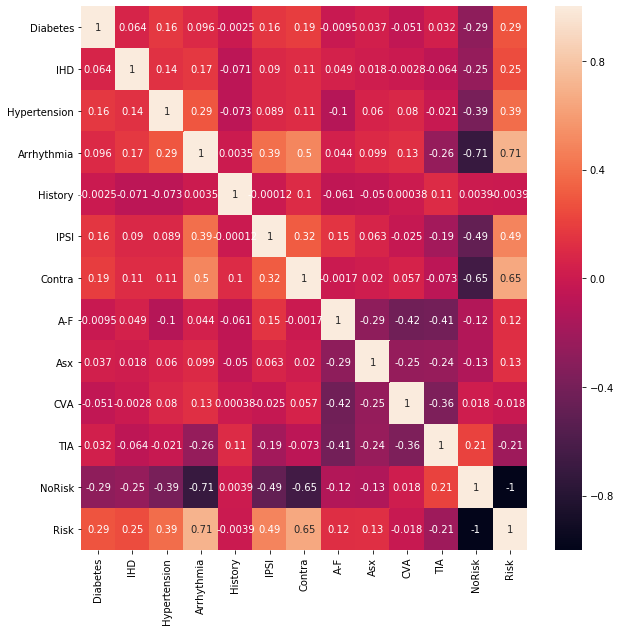

In [31]:
#Seaborn Heatmap Documentation - https://seaborn.pydata.org/generated/seaborn.heatmap.html

fig, ax = plt.subplots(figsize=(10,10)) #Increase heatmap size  
sns.heatmap(MedicalRecordsCorr,annot=True) #Display heatmap

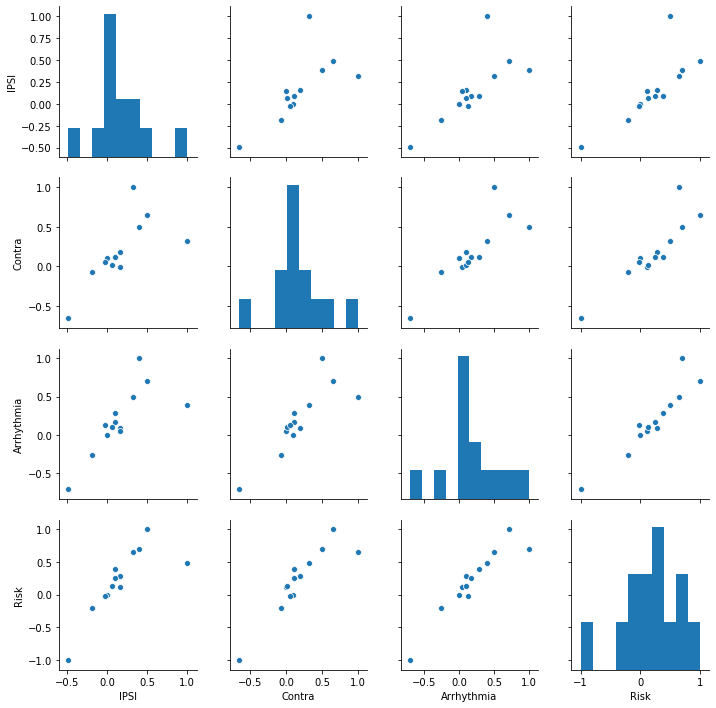

In [32]:
#Seaborn Pairplot Documentation - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(MedicalRecordsCorr,vars = ['IPSI','Contra','Arrhythmia','Risk'] )#Display Pairplot correlations

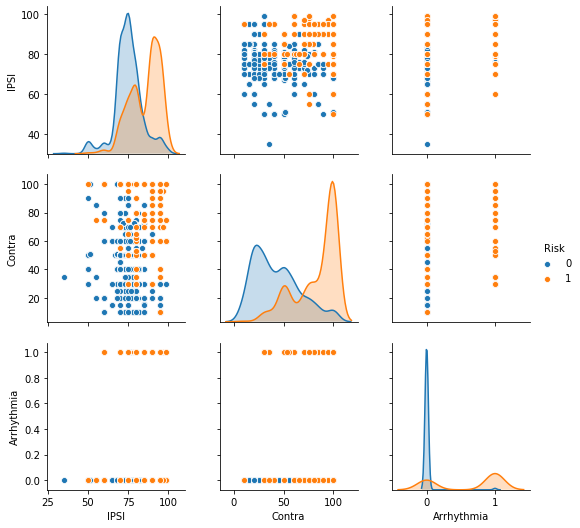

In [33]:
#Seaborn Pairplot Documentation - https://seaborn.pydata.org/generated/seaborn.pairplot.html
#Display Pairplot correlations
sns.pairplot(MedicalRecordsDummies,vars = ['IPSI','Contra','Arrhythmia'], hue="Risk" )

There seems to be correlations between the following

###### Arrhythmia - Risk (Very Strong Correlation)

###### Contra - Risk (Strong Correlation)

###### IPSI - Risk (Strong Correlation)




### Visulise the Correlations

The plot below seems to support the correlation between IPSI and Risk, as the IPSI number increases the chance you are a risk also increases. This is by no means a certain stat as some at 99 IPSI are not a risk.

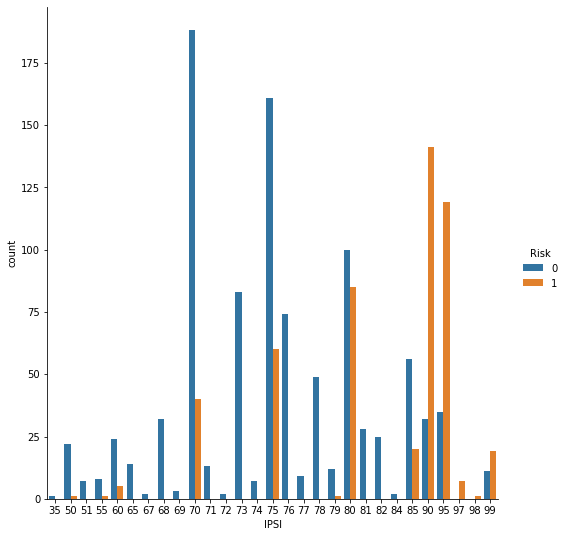

In [34]:
#Seaborn Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html

#plot ISPI Vs Risk
RiskVsIPSICorr = sns.catplot("IPSI",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk') 
#Set the size to be bigger (Was Initally diffcult to read)
RiskVsIPSICorr.fig.set_size_inches(8,8)

The plot below seems to support the correlation between Contra and Risk, as as the Contra number increases the chance you are a risk also increases. This correlation is particularly strong as when someone has 100%, they have a very high chance of being a risk.

As with the IPSI and Risk this is by no means certain as there are people that have 100% contra but are not at Risk


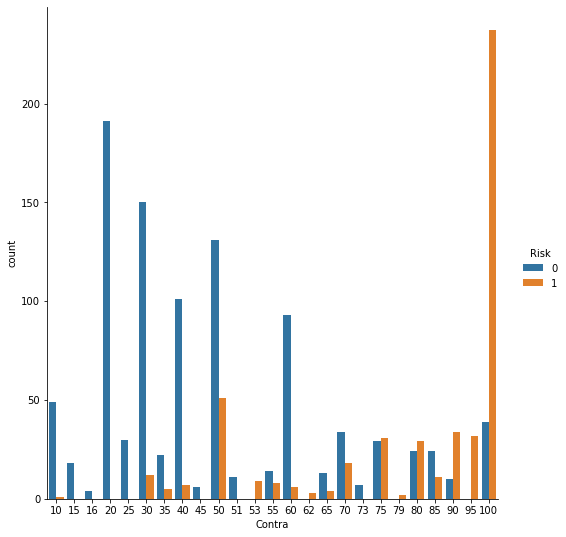

In [35]:
#Seaborn Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html

#plot ISPI Vs Risk
RiskVsContraCorr = sns.catplot("Contra",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
#Set the size to be bigger (Was Initally diffcult to read)
RiskVsContraCorr.fig.set_size_inches(8,8)

The plot below seems to support the Very strong correlation between Arrhythmia and Risk, if the patient has Arrhythmia the chance you are a risk significantly increases.

As with the other correlations it’s not certain as some people have Arrhythmia but are not a risk and people that have it that are not a risk


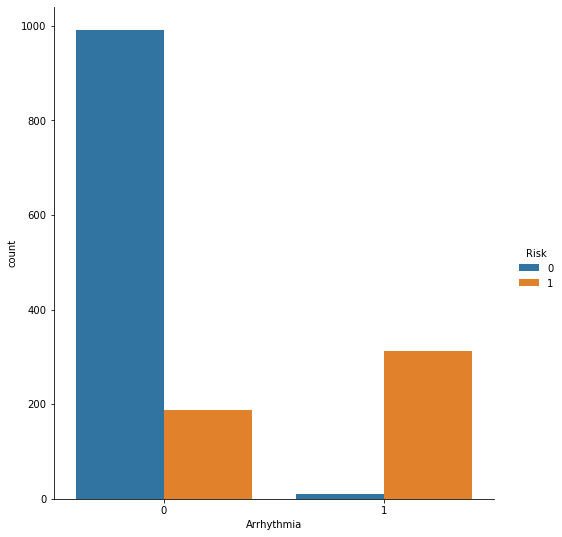

In [36]:
#Seaborn Catplot Documentation - https://seaborn.pydata.org/generated/seaborn.catplot.html

#plot ISPI Vs Risk
RiskVsArrhythmiaCorr = sns.catplot("Arrhythmia",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
#Set the size to be bigger (Was Initally diffcult to read)
RiskVsArrhythmiaCorr.fig.set_size_inches(8,8)

### Look for any outliers that may be skewing the correlations 

The boxplot below shows the outliers in IPSI, there are only 3 of them which is not large enough to skew the results of the correlation. I am also not going to drop these values as they still could be valid data that can be used to train a model.

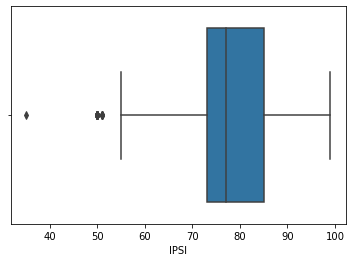

In [37]:
#Seaborn boxplot Documentation - https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x = "IPSI",  data = MedicalRecordsDummies) #Display a boxplot of IPSI

The reason there are outliers is probably due to the fact the data is skewed to the higher values which means that the outliers are probably correct values.

These may be dropped later on to see if accuracy is improved.

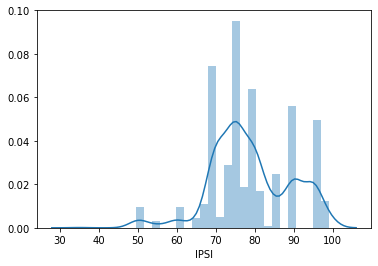

In [38]:
#Seaborn Displot Documentation - https://seaborn.pydata.org/generated/seaborn.distplot.html

sns.distplot(MedicalRecordsDummies['IPSI'])#Display a Dsiplot of IPSI

Unlike IPSI, Contra has no outliers so any results can not be skewed. This is also reflected by the wide spread of data values in the distplot. 


Additionally, plotting Arrhythmia wouldnt show any outliers as the data was a clean booleon 

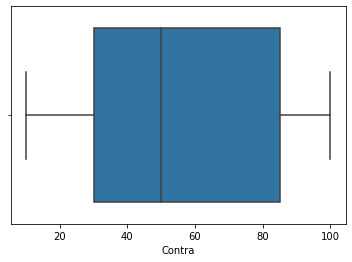

In [39]:
#Seaborn boxplot Documentation - https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(x = "Contra", data = MedicalRecordsDummies)#Display a boxplot of Contra

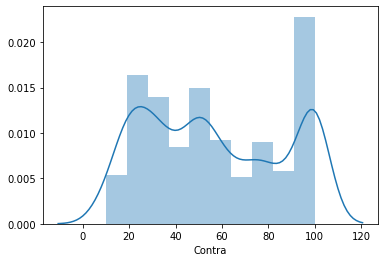

In [40]:
#Seaborn Displot Documentation - https://seaborn.pydata.org/generated/seaborn.distplot.html

sns.distplot(MedicalRecordsDummies['Contra'])#Display a Dsiplot of Contra

# Modeling

### Prepare for Modeling

Prepare for modelling by copying the dummies data and dropping the NoRisk column as having a negative Risk means no Risk

In [41]:
#Sklearn LabelEncoder Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

ModelCopy = MedicalRecordsWorkingCopy.copy() #Make a copy for models

ModelCopy.rename(columns={'label': 'Risk'}, inplace=True) #Rename the column label to risk

ModelCopy['Risk'] = le.fit_transform(ModelCopy['Risk']) #turn Risk into a binary value
ModelCopy['Diabetes'] = le.fit_transform(ModelCopy['Diabetes'])#turn Diabetes into a binary value
ModelCopy['IHD'] = le.fit_transform(ModelCopy['IHD'])#turn IHD into a binary value
ModelCopy['Hypertension'] = le.fit_transform(ModelCopy['Hypertension'])#turn Hypertension into a binary value
ModelCopy['Arrhythmia'] = le.fit_transform(ModelCopy['Arrhythmia'])#turn Arrhythmia into a binary value
ModelCopy['History'] = le.fit_transform(ModelCopy['History'])#turn History into a binary value

ModelCopy.head() #Display the top 5 Values

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk,A-F,Asx,CVA,TIA
0,0,0,1,0,0,78,20,0,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,0,1
2,0,1,1,0,0,95,40,1,1,0,0,0
3,0,0,1,0,0,90,85,1,0,0,0,1
4,0,0,0,0,0,70,20,0,0,0,1,0


### Splitting the data

To train a model you require a target dataset (what you are trying to predict(Y Data)) the rest of the data (X Data) split into two. The first of which is the Risk data I am trying to predict, this has been split from the data set below

In [42]:
MedicalRecordsRisk = ModelCopy[['Risk']] #get the Risk Column as a new DataFrame
MedicalRecordsRisk.head()#Display the top 5 Values

,Risk
0,0
1,0
2,1
3,1
4,0


The second data set is the rest of the data, I dropped the risk column as if the model had the risk it couldn’t learn what to predict properly. it cannot learn what it already knows.

In [43]:
ModelCopy = ModelCopy.drop(columns=['Risk']) #Drop the Risk Column
ModelCopy.head()#Display the top 5 Values

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA
0,0,0,1,0,0,78,20,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,1
2,0,1,1,0,0,95,40,1,0,0,0
3,0,0,1,0,0,90,85,0,0,0,1
4,0,0,0,0,0,70,20,0,0,1,0


This data is then split into four sets of data 
x training set (The data without risk for training the model)
x test set (The data without the risk for testing the model) 
y training set (the risk data for training the model) 
y test (the risk data for testing the model) 

This is a 70% / 30% split between the Training and Test set, this is to ensure there is enough data to train and enough unseen data to test the model. 

This set is picked randomly from the dataset to ensure there is no bias in the picked data that might cause the model to underfit or overfit.

In [44]:
#Sklearn Train_test_Split Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#Split the data into the test sets
xTrain, xTest,yTrain,yTest = train_test_split(ModelCopy,MedicalRecordsRisk, test_size = 0.30, shuffle = False)

Number of records in training set: Risk    1050
dtype: int64
Number of records in training set: Risk    450
dtype: int64


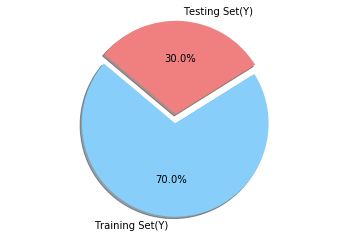

In [45]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

print("Number of records in training set:",yTrain.count()) #Retreive the count of yTrain dataset
print("Number of records in training set:", yTest.count()) #Retreive the count of yTest dataset


labels = 'Training Set(Y)', 'Testing Set(Y)' #Label the segments 
sizes = [1050, 450] #Show the values of the duplicated data
colors = ['lightskyblue', 'lightcoral'] #set the colours
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')#show the chart
plt.show()

Number of records in training set: Diabetes        1050
IHD             1050
Hypertension    1050
Arrhythmia      1050
History         1050
IPSI            1050
Contra          1050
A-F             1050
Asx             1050
CVA             1050
TIA             1050
dtype: int64
Number of records in Testing set: Diabetes        450
IHD             450
Hypertension    450
Arrhythmia      450
History         450
IPSI            450
Contra          450
A-F             450
Asx             450
CVA             450
TIA             450
dtype: int64


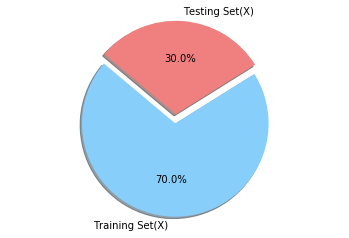

In [46]:
#MatPlotLib Pie Charts - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

print("Number of records in training set:",xTrain.count()) #Retreive the count of xTrain dataset
print("Number of records in Testing set:", xTest.count()) #Retreive the count of xTest dataset


labels = 'Training Set(X)', 'Testing Set(X)' #Label the segments 
sizes = [1050, 450] #Show the values of the duplicated data
colors = ['lightskyblue', 'lightcoral'] #set the colours
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, #plot the pie chart
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')#show the chart
plt.show()

## Logistical Regression

Logistical regression was used instead of Linear Regreression as Linear is not great for classifying values and deals with exponential data. Logistical regression however is built for classification (Classification model) and will allow predictions of Risk and NoRisk

In [47]:
#Logistic Regression Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#Create the model
LogisticRegressionModel = LogisticRegression(solver = 'lbfgs' ,max_iter = 1000, multi_class="auto") 

YtestarrayLogisticRegression = yTest.to_numpy().flatten() #create arrays of data
YtrainarrayLogisticRegression = yTrain.to_numpy().flatten()#create arrays of data

##### Train the data 

In [48]:
#Logistic Regression Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#Fir the Logistic regression Model
LogisticRegression = LogisticRegressionModel.fit(xTrain, YtrainarrayLogisticRegression)

##### use the model to predict the results

In [49]:

#use the model to predict the data
yPredtestLogisticRegression = LogisticRegressionModel.predict(xTest)

##### Store predictions in a dataframe

In [50]:
#place the predicted data and the real data in the dataframe
LogisticRegressionPrediction = pd.DataFrame({'Actual': YtestarrayLogisticRegression, 'Predicted': yPredtestLogisticRegression})
LogisticRegressionPrediction.head() #Display the top 5 Values

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


## Decision Tree

In [51]:
#Decision Tree Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#Declare a decision tree model
DecisionTreeModel = tree.DecisionTreeClassifier(max_depth = 5,class_weight = "balanced")

In [52]:
#Decision Tree Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#Fit the model
DecisionTreeModel = DecisionTreeModel.fit(xTrain, yTrain)

In [53]:
#Code taken from Bhavesh Bhatt in his video about plotting Desision trees using Graphviz - https://www.youtube.com/watch?v=0V4c4pOP9BM

def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

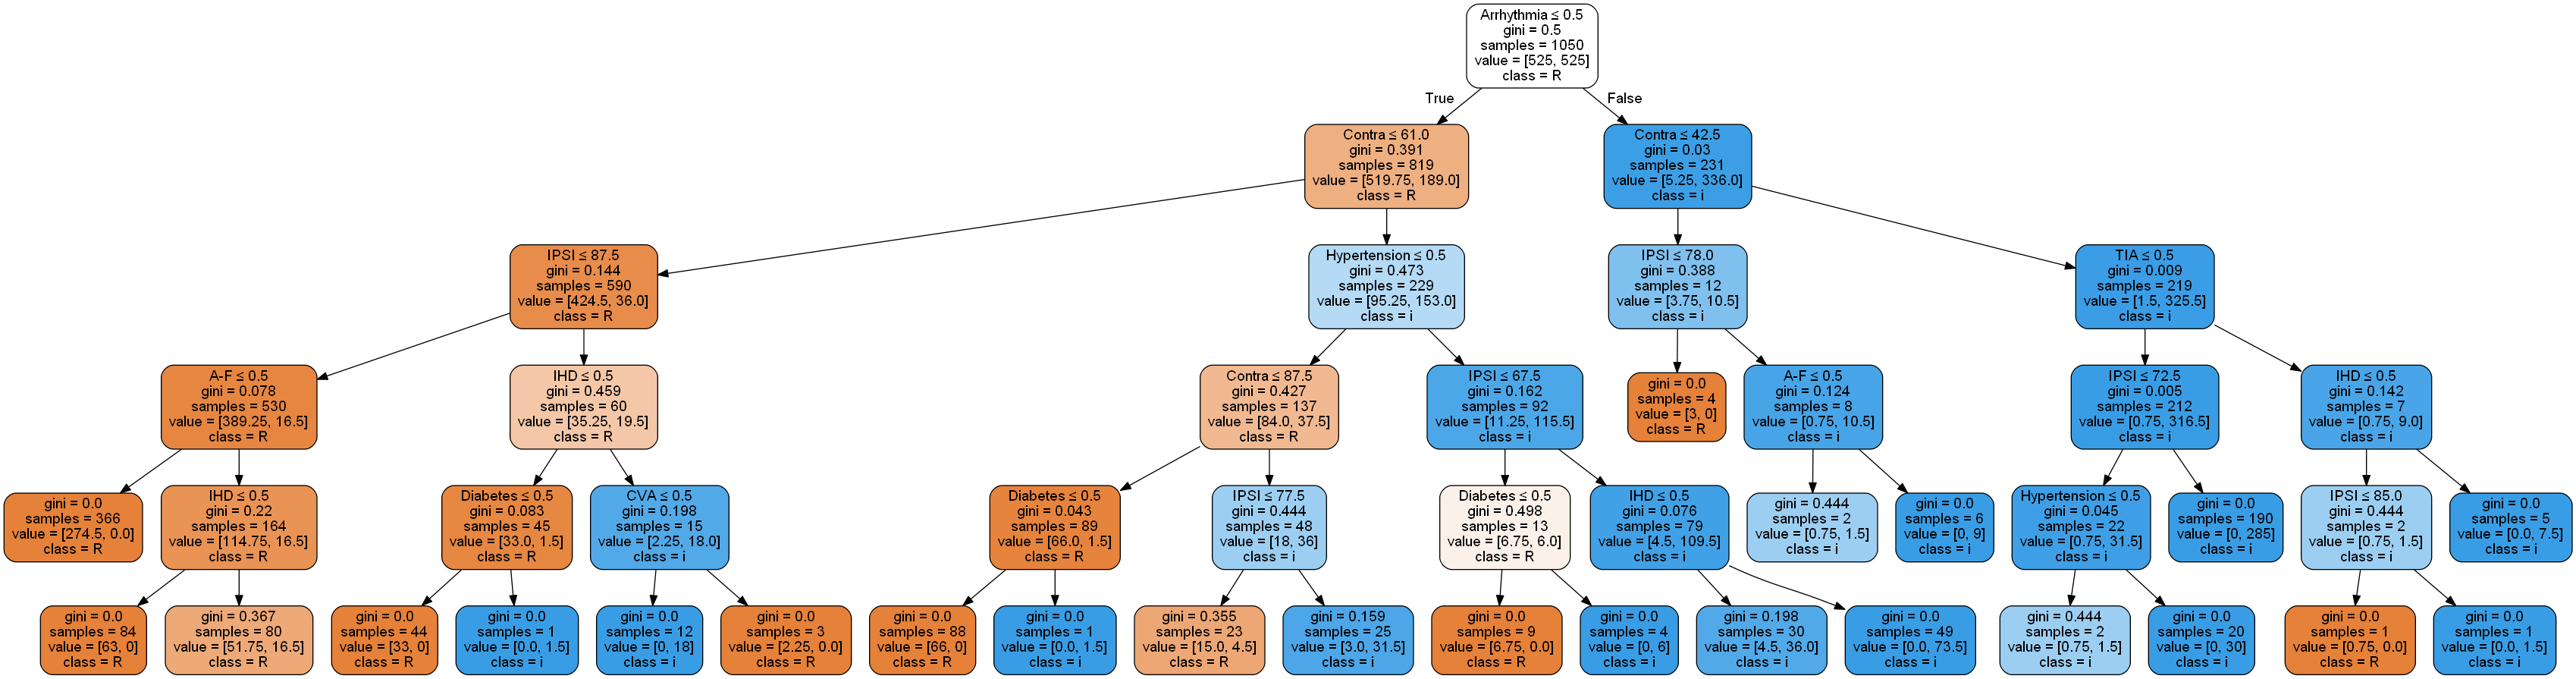

In [54]:
#Plot Decision Tree
plot_decision_tree(DecisionTreeModel,xTrain.columns,yTrain.columns[0])

In [55]:
yPredictDecisionTree = DecisionTreeModel.predict(xTest) #Predict y data using Model
YtestarrayDecisionTree = yTest.to_numpy().flatten() #create arrays of data

#place data into a dataframe 
DescisionTreePrediction = pd.DataFrame({'Actual': YtestarrayDecisionTree, 'Predicted': yPredictDecisionTree})
DescisionTreePrediction.head()#Show the top 5 Results

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


## Neural Network

In [56]:
#Neural Network Classifier Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

YtestarrayNeuralNetwork = yTest.to_numpy().flatten() 

#Create a neural Network Classifier 
NeuralNetworkModel = MLPClassifier(solver ='sgd',activation='logistic',max_iter=500000)

In [57]:
#Train the neural network
NeuralNetworkModel.fit(xTrain,yTrain)

c:\users\james\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## K-Nearest Neighbours

# Evaluation

### Logistic Regression

In [58]:
LogisticRegressionCrossVal = cross_val_score(LogisticRegressionModel,xTest, YtestarrayLogisticRegression, cv=10)
print ("Cross Validation Accuracy Score(Logistic Regression):" ,np.average(LogisticRegressionCrossVal))
print("Cross Validation Standard Deviation(Logistic Regression): ",LogisticRegressionCrossVal.std())
print("Cross Validation Accuracy Min(Logistic Regression):",np.average(LogisticRegressionCrossVal)-LogisticRegressionCrossVal.std())
print("Cross Validation Accuracy Max(Logistic Regression):",np.average(LogisticRegressionCrossVal)+ LogisticRegressionCrossVal.std())

Cross Validation Accuracy Score(Logistic Regression): 0.9555555555555555
Cross Validation Standard Deviation(Logistic Regression):  0.0344265186329548
Cross Validation Accuracy Min(Logistic Regression): 0.9211290369226007
Cross Validation Accuracy Max(Logistic Regression): 0.9899820741885103


Confusion matrix, without normalization
[[293   7]
 [ 13 137]]


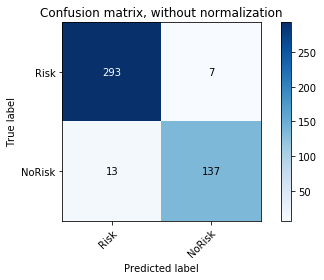

In [59]:
yPredCrossValLogisticRegression = cross_val_predict(LogisticRegressionModel, xTest, YtestarrayLogisticRegression, cv=10)

#plot confusion matrix based on Predicted data and real data
plot_confusion_matrix(YtestarrayLogisticRegression, yPredCrossValLogisticRegression, classes=classes, title='Confusion matrix, without normalization')
ConfusionLogisticRegression = confusion_matrix(YtestarrayLogisticRegression, yPredCrossValLogisticRegression)

Normalized confusion matrix
[[0.97666667 0.02333333]
 [0.08666667 0.91333333]]


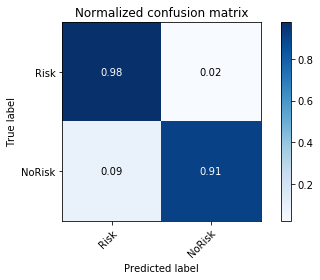

In [60]:
#plot confusion matrix based on Predicted data and real data, Normalised
plot_confusion_matrix(YtestarrayLogisticRegression, yPredCrossValLogisticRegression, classes=classes, normalize=True, title='Normalized confusion matrix')

In [61]:
LogisticRegressionReport = classification_report(YtestarrayLogisticRegression, yPredCrossValLogisticRegression)
print(LogisticRegressionReport)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       300
           1       0.95      0.91      0.93       150

    accuracy                           0.96       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.96      0.96      0.96       450



In [62]:
TPLogisticRegression = ConfusionLogisticRegression[1, 1]
TNLogisticRegression = ConfusionLogisticRegression[0, 0]
FPLogisticRegression = ConfusionLogisticRegression[0, 1]
FNLogisticRegression = ConfusionLogisticRegression[1, 0]


ErrorValLogisticRegression = (FPLogisticRegression + FNLogisticRegression) / float(TPLogisticRegression + TNLogisticRegression + FPLogisticRegression + FNLogisticRegression)
SpecificityLogisticRegression = TNLogisticRegression / (TNLogisticRegression + FPLogisticRegression)
FPRateLogisticRegression = FPLogisticRegression / float(TNLogisticRegression + FPLogisticRegression)

print(ErrorValLogisticRegression)#how often is the model incorrect
print(SpecificityLogisticRegression) #Specificity 
print(FPRateLogisticRegression) #False positive rate

0.044444444444444446
0.9766666666666667
0.023333333333333334


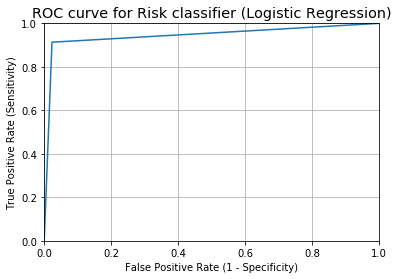

In [63]:
fprLogisticRegression, tprLogisticRegression, thresholdsLogisticRegression = metrics.roc_curve(YtestarrayLogisticRegression, yPredCrossValLogisticRegression)

plt.plot(fprLogisticRegression, tprLogisticRegression)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Risk classifier (Logistic Regression)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [64]:
roc_auc_score(YtestarrayLogisticRegression, yPredCrossValLogisticRegression)

0.945

### Decision Tree

In [65]:
DecisionTreeCrossVal = cross_val_score(DecisionTreeModel,xTest, YtestarrayDecisionTree, cv=10)

print ("Cross Validation Accuracy Score(Decision Tree):" ,np.average(DecisionTreeCrossVal))
print("Cross Validation Standard Deviation(Decision Tree): ",DecisionTreeCrossVal.std())
print("Cross Validation Accuracy Min(Decision Tree):",np.average(DecisionTreeCrossVal)-DecisionTreeCrossVal.std())
print("Cross Validation Accuracy Max(Decision Tree):",np.average(DecisionTreeCrossVal)+ DecisionTreeCrossVal.std())

Cross Validation Accuracy Score(Decision Tree): 0.9533333333333334
Cross Validation Standard Deviation(Decision Tree):  0.03212629398844658
Cross Validation Accuracy Min(Decision Tree): 0.9212070393448868
Cross Validation Accuracy Max(Decision Tree): 0.9854596273217799


Confusion matrix, without normalization
[[286  14]
 [  8 142]]


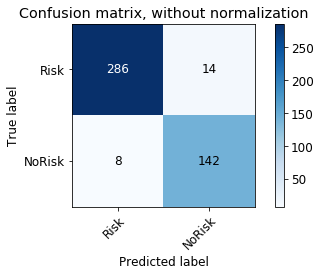

In [66]:
yPredCrossValDecisionTree = cross_val_predict(DecisionTreeModel, xTest, YtestarrayDecisionTree, cv=10)

#plot confusion matrix based on Predicted data and real data
plot_confusion_matrix(YtestarrayDecisionTree, yPredCrossValDecisionTree, classes=classes, title='Confusion matrix, without normalization')
ConfusionDecisionTree = confusion_matrix(YtestarrayDecisionTree, yPredCrossValDecisionTree)

Normalized confusion matrix
[[0.95333333 0.04666667]
 [0.05333333 0.94666667]]


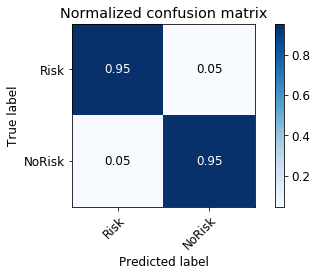

In [67]:
#plot confusion matrix based on Predicted data and real data, Normalised
plot_confusion_matrix(YtestarrayDecisionTree, yPredCrossValDecisionTree, classes=classes, normalize=True, title='Normalized confusion matrix')

In [68]:
DecisionTreeReport = classification_report(YtestarrayDecisionTree, yPredCrossValDecisionTree)
print(DecisionTreeReport)
#Recall True Positive rate

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       300
           1       0.91      0.95      0.93       150

    accuracy                           0.95       450
   macro avg       0.94      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [69]:
TPDecisionTree = ConfusionDecisionTree[1, 1]
TNDecisionTree = ConfusionDecisionTree[0, 0]
FPDecisionTree = ConfusionDecisionTree[0, 1]
FNDecisionTree = ConfusionDecisionTree[1, 0]


ErrorValDecisionTree = (FPDecisionTree + FNDecisionTree) / float(TPDecisionTree + TNDecisionTree + FPDecisionTree + FNDecisionTree)
SpecificityDecisionTree = TNDecisionTree / (TNDecisionTree + FPDecisionTree)
FPRateDecisionTree = FPDecisionTree / float(TNDecisionTree + FPDecisionTree)

print(ErrorValDecisionTree)#how often is the model incorrect
print(SpecificityDecisionTree) #Specificity 
print(FPRateDecisionTree) #False positive rate

0.04888888888888889
0.9533333333333334
0.04666666666666667


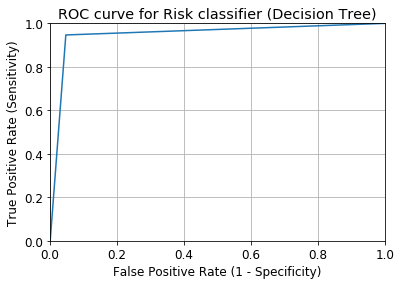

In [70]:
fprDecisionTree, tprDecisionTree, thresholdsDecisionTree = metrics.roc_curve(YtestarrayDecisionTree, yPredCrossValDecisionTree)

plt.plot(fprDecisionTree, tprDecisionTree)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Risk classifier (Decision Tree)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [71]:
roc_auc_score(YtestarrayDecisionTree, yPredCrossValDecisionTree)

0.9500000000000002

### Neural Network

In [72]:
NeuralNetworkCrossVal = cross_val_score(NeuralNetworkModel,xTest, YtestarrayNeuralNetwork, cv=10)

print("Cross Validation Accuracy Score(Neural Network):" ,np.average(NeuralNetworkCrossVal))
print("Cross Validation Standard Deviation(Neural Network): ",NeuralNetworkCrossVal.std())
print("Cross Validation Accuracy Min(Neural Network):",np.average(NeuralNetworkCrossVal)-NeuralNetworkCrossVal.std())
print("Cross Validation Accuracy Max(Neural Network):",np.average(NeuralNetworkCrossVal)+ NeuralNetworkCrossVal.std())

Cross Validation Accuracy Score(Neural Network): 0.7688888888888888
Cross Validation Standard Deviation(Neural Network):  0.060614140875492696
Cross Validation Accuracy Min(Neural Network): 0.7082747480133962
Cross Validation Accuracy Max(Neural Network): 0.8295030297643815


Confusion matrix, without normalization
[[251  49]
 [ 44 106]]


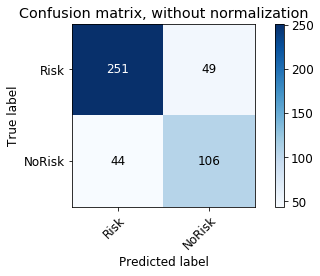

In [73]:
yPredCrossValNeuralNetwork = cross_val_predict(NeuralNetworkModel, xTest, YtestarrayNeuralNetwork, cv=10)

#plot confusion matrix based on Predicted data and real data
plot_confusion_matrix(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork, classes=classes, title='Confusion matrix, without normalization')
ConfusionNeuralNetwork = confusion_matrix(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork)

Normalized confusion matrix
[[0.83666667 0.16333333]
 [0.29333333 0.70666667]]


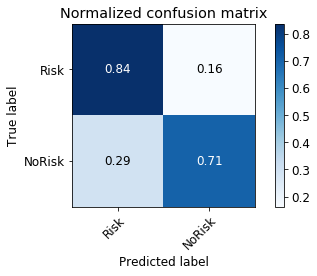

In [74]:
#plot confusion matrix based on Predicted data and real data, Normalised
plot_confusion_matrix(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork, classes=classes, normalize=True, title='Normalized confusion matrix')

In [75]:
NeuralNetworkReport = classification_report(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork)
print(NeuralNetworkReport)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       300
           1       0.68      0.71      0.70       150

    accuracy                           0.79       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.80      0.79      0.79       450



In [76]:
TPNeuralNetwork = ConfusionNeuralNetwork[1, 1]
TNNeuralNetwork = ConfusionNeuralNetwork[0, 0]
FPNeuralNetwork = ConfusionNeuralNetwork[0, 1]
FNNeuralNetwork = ConfusionNeuralNetwork[1, 0]


ErrorValNeuralNetwork = (FPNeuralNetwork + FNNeuralNetwork) / float(TPNeuralNetwork + TNNeuralNetwork + FPNeuralNetwork + FNNeuralNetwork)
SpecificityNeuralNetwork = TNNeuralNetwork / (TNNeuralNetwork + FPNeuralNetwork)
FPRateNeuralNetwork = FPNeuralNetwork / float(TNNeuralNetwork + FPNeuralNetwork)

print(ErrorValNeuralNetwork)#how often is the model incorrect
print(SpecificityNeuralNetwork) #Specificity 
print(FPRateNeuralNetwork) #False positive rate

0.20666666666666667
0.8366666666666667
0.16333333333333333


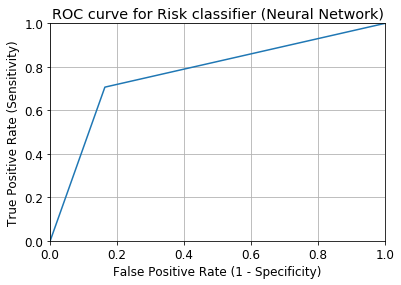

In [77]:
fprNeuralNetwork, tprNeuralNetwork, thresholdsNeuralNetwork = metrics.roc_curve(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork)

plt.plot(fprNeuralNetwork, tprNeuralNetwork)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Risk classifier (Neural Network)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [78]:
roc_auc_score(YtestarrayNeuralNetwork, yPredCrossValNeuralNetwork)

0.7716666666666667